In general we would be following below steps part of Logistic Regression. Now we would apply what is more relevant in this use case.

1. Importing data
2. Understanding Data
3. Data Preparation
    a. Data Cleaning
    b. handling outliers for numeric variables
    c. analyze categorical variables using countplots
    d. handled yes/no fields
    e. Removing unnecessary fields
    f. Dummification of Categorical Variables
    g. Handling null and select values
4. Exploratory Data Analysis 
    a. Visualising Numeric Variables 
    b. Visualising Categorical Variables
    
5. Splitting the Data into Training and Testing Sets 
    a. Splitting the Data into Training and Testing Sets 
    b. Rescaling variables.

6. Building a Logistic model 
    a. Identify Correlation using VIF and heat maps 
    b. Build model:
         Top ‘n’ features: Recursive Feature elimination (RFE): 
         Manual elimination process based on pvalue, VIF

7. Plotting the ROC Curve
8. Finding Optimal Cutoff Point
9. Model Evaluation
    a. Specificity
    b. Accuracy
    c. Sensitivity
    d. Precision

10. Making predictions on the test set using final model
11. Validate if the test and the train set metrics align.

#### Step 1: Importing data

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading Leads.csv file
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Step 2: Understanding Data

In [7]:
df.shape

(9240, 37)

In [8]:
# checking info to understand the null values and the data types of the fields.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### there are lot of null values that need to be handled. 

In [9]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Step 3: Data Preparation

##### Data Cleaning

In [10]:
# There are no duplicates in the dataset
any(df.duplicated())

False

In [11]:
print(any(df.duplicated(subset='Prospect ID')))
print(any(df.duplicated(subset='Lead Number')))

# As both the columns are unique to each record, we can drop 1 column 'Prospect ID' and we can use Lead Number for record 
# identifier

False
False


In [12]:
# Dropping the column "Prospect ID" and retaining "Lead Number"
df.drop(columns=['Prospect ID'],axis=1,inplace=True)

#### Handling null and select values

In [13]:
# Replacing Select with null values as its given in the use case description.
df.replace('Select',np.nan,inplace=True)

In [14]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# Checking all the columns for their null counts.
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [16]:
# Identifying columns with missing value percentage > 40%. These columns need to be dropped as we cant do analysis when huge
# values are missing.
columnstobedeleted=df.columns[round(df.isnull().mean()*100)>=40].to_list()
columnstobedeleted

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
#Dropping columns with missing value percentage greater than or equals 40%.
df.drop(columnstobedeleted,axis=1,inplace=True)

In [18]:
# identifying all the other columns that have missing or null values.
columnstobehandled=df.isnull().mean()*100
columnstobehandled[columnstobehandled>0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
dtype: float64

Handling null values in the descending order of the highest number of nulls
Lets plot the countplot for the missing columns

In [19]:
# Checking shape after dropping certain columns.
df.shape

(9240, 28)

In [20]:
# Let's check value counts of Specialization.

df['Specialization'].value_counts(dropna=False)


NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We observed that for the fields "Specialization","Lead Source","Last Activity", "What is your current occupation" and "Last Notable Activity", there are few values that occur very less number of times. Clubbing them all to the other section. If not done, there would would be many columns during dummification.

In [21]:
# There are no categories like 'Unknown' or 'Not Sure', nor the occurance of a category is very high. 
# So, going with new category 'Not Specified' for null values.
# Also, grouping management and business related values 

df['Specialization'].replace(np.nan,'Not Specified',inplace=True)
df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                              'IT Projects Management','Supply Chain Management','Healthcare Management',
                              'Hospitality Management','Retail Management'],'Management Specialization',inplace=True)
df['Specialization'].replace(['International Business','Rural and Agribusiness','E-Business'],'Business Specialization'
                             ,inplace=True)

In [22]:
df['Tags'].value_counts(dropna=False,normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [23]:
#  This column is tagged by sales team for their understanding. This column seems have exogenous intuition based values, 
# it wont provide any value for this use case so dropping Tags field.
notrelevantcolumns=['Tags']

In [24]:
# Let's check value counts of "What matters most to you in choosing a course".

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# This is a clear indication that most of the values are either missing or "Better Career Prospects". Its better to drop this column
notrelevantcolumns.append('What matters most to you in choosing a course')

In [26]:
# There are lot of missing values in 'What is your current occupation'.
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# We can impute the missing values with "Not Specified"
df['What is your current occupation'].replace(np.nan,'Not Specified',inplace=True)

In [28]:
# We can group 'Businessman','Housewife' to 'Other' as their occurance is very less in this dataset.
df['What is your current occupation'].replace([ 'Businessman','Housewife'],'Other',inplace=True)

In [29]:
# Let's check value counts of "Country".

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [30]:
# This is a clear indication that most of the values are either missing or "India". Its better to drop this column

notrelevantcolumns.append('Country')

In [31]:
df.shape

(9240, 28)

In [32]:
# Lets check the other columns with null values.
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [33]:
# Replacing missing 'TotalVisits' with its median. 
df['TotalVisits']=df['TotalVisits'].replace(np.nan,df['TotalVisits'].median())

In [34]:
# Replacing missing 'Page Views Per Visit' with its median. 
df['Page Views Per Visit']=df['Page Views Per Visit'].replace(np.nan,df['Page Views Per Visit'].median())

In [35]:
# Let's check value counts of "Last Activity".
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
# Replacing null values with 'Email Opened' as there are only 103 missing values and 'Email Opened' has many occurances.
df['Last Activity']=df['Last Activity'].replace(np.nan,'Email Opened')

In [37]:
# Replacing the least occuring 'Last Activity' values with 'Other Last Activity'

df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
 'Visited Booth in Tradeshow','Approached upfront',
 'Resubscribed to emails','Email Received','Email Marked Spam','Unreachable','Unsubscribed'],'Other Last Activity',inplace=True)

In [38]:
# Let's check value counts of "Lead Source".
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
# Replacing null values with 'Google' as there are only 36 missing values and 'Google' has many occurances.
# Replacing the least occuring 'Lead Source' values with 'Other Lead Sources'

df['Lead Source'].replace([np.nan,'google'],'Google',inplace=True)
df['Lead Source'].replace(['blog',
 'Pay per Click Ads','bing','Social Media','WeLearn','Click2call',
 'Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release',
 'NC_EDM','Facebook'],'Other Lead Sources',inplace=True)

In [40]:
# Let's check value counts of "Last Notable Activity".

df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [41]:
# Replacing the least occuring 'Last Notable Activity' values with 'Other Last Notable Activity'

df['Last Notable Activity'].replace([ 'Had a Phone Conversation',
 'Approached upfront','Resubscribed to emails',
 'View in browser link Clicked','Form Submitted on Website',
 'Email Received','Email Marked Spam','Olark Chat Conversation','Email Link Clicked',
 'Email Bounced','Unsubscribed','Unreachable'],'Other Last Notable Activity',inplace=True)

In [42]:
# Lets analyze other categorical fields.

otherCategoricalColumns=['Do Not Email',
       'Do Not Call',
       'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

df[otherCategoricalColumns].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [43]:
# Printing the value counts for all the other categorical columns. 
for i in otherCategoricalColumns:
    print(df[i].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


Columns like 'Do Not Call',
       'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque' are inclined towards one single value. 
       These fields don't help us in predicting the model. We will drop them.  

In [44]:
# Dropping the columns that wont help in model prediction as values in these columns are inclined towards one single value.
notrelevantcolumns.extend(['Do Not Call',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'])

# df.drop(tobedeletedcolumns_inclined,axis=1,inplace=True)

In [45]:
df.drop(notrelevantcolumns,axis=1,inplace=True)

In [46]:
# Null values are handled.
df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [47]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


In [48]:
# All columns are handled with null values.
revisedcolumnstobehandled=df.isnull().mean()*100
revisedcolumnstobehandled[revisedcolumnstobehandled>0]

Series([], dtype: float64)

In [49]:
df.shape

(9240, 13)

#### Step 4: Exploratory Data Analysis

In [50]:
univariateint_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()
univariateint_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

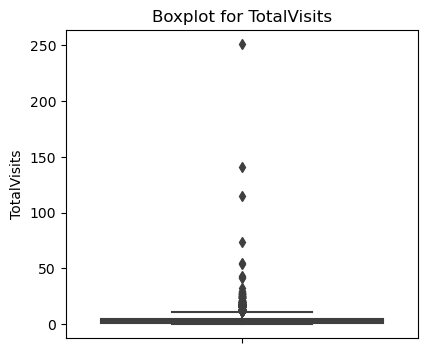

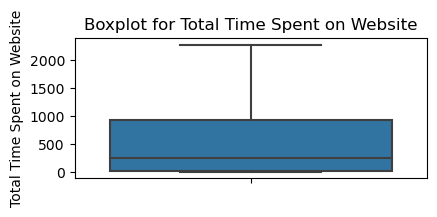

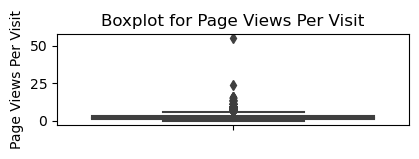

In [51]:
# Box Plotting for numeric variables part of univariate analysis.

univariateint_cols=['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

count=1

for i in univariateint_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(count,2,1)
    plt.title('Boxplot for '+i)
    sns.boxplot(y=df[i])
    count+=1
    plt.show()

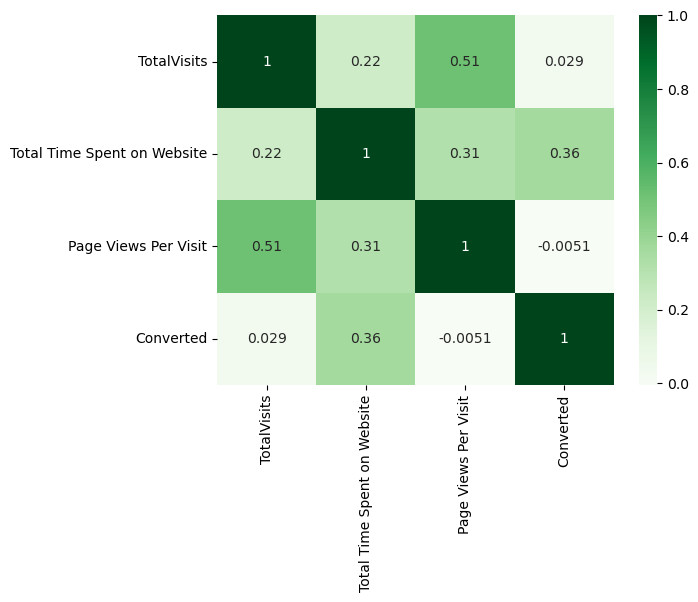

In [52]:
# Heatmap with numeric fields.
sns.heatmap(df[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit','Converted']].corr(),annot=True,cmap='Greens')
plt.show()

"TotalVisits" and "Page Views Per Visit" are correlated with 0.51.
"Total Time spent on website" and Converted fields are correlated with 0.36.  

In [53]:
# Looks like there are lot of outliers on TotalVisits and Page Views Per Visit. Lets handle them one after the other.

df[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']].describe(percentiles=[0.05,0.75,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


Even from the above table, it shows that there are lot of outliers.
Will assign anything below 0.05 percentile to 0.05 and above max cut off to max cut off level.

In [54]:
#Analyzing outliers for TotalVisits
totalVisits_lower_quantile=df['TotalVisits'].quantile(0.05)
df[df['TotalVisits']<totalVisits_lower_quantile]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity


In [55]:
#Identifying the upper extreme value limit for the totalvisits field.
IQR_TotalVisits=df['TotalVisits'].quantile(0.75)-df['TotalVisits'].quantile(0.25)
max_limit_TotalVisits=df['TotalVisits'].quantile(0.75)+IQR_TotalVisits*1.5
max_limit_TotalVisits

11.0

In [56]:
# From the box plot as well as from the totalVisits_lower_quantile, its clear that there are no values before 0.05 percentile.
# Lets see if there are any values after .75*IQR*1.5.

len(df[df['TotalVisits']>max_limit_TotalVisits])

# there are 267 outliers that crossed totalvisits=11.

267

In [57]:
# Assigning TotalVisits=11 (upper extreme value limit) to the values with TotalVisits>11.
df['TotalVisits']=df['TotalVisits'].apply(lambda x: max_limit_TotalVisits  if x>=max_limit_TotalVisits else x)

In [58]:
#Identifying the upper extreme value limit for the "Total Time Spent on Website" field.
IQR_timeSpent=df['Total Time Spent on Website'].quantile(0.75)-df['Total Time Spent on Website'].quantile(0.25)
max_limit_timeSpent=df['Total Time Spent on Website'].quantile(0.75)+IQR_timeSpent*1.5
max_limit_timeSpent

2322.0

In [59]:
#Analyzing outliers for timespent
timespent_lower_quantile=df['Total Time Spent on Website'].quantile(0.05)
df[df['Total Time Spent on Website']<timespent_lower_quantile]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity


In [60]:
# There are no values below lower extreme value limit.
timespent_lower_quantile

0.0

In [61]:
# From the box plot as well as from the timespent_lower_quantile, its clear that there are no values before 0.05 percentile.
# Lets see if there are any values after .75*IQR*1.5.

len(df[df['Total Time Spent on Website']>max_limit_timeSpent])

# there are 0 values that are outliers.

0

There are no outliers in the Total Time Spent on Website field.

In [62]:
#Analyzing outliers for "Page Views Per Visit" field.
pgViewsPerVisit_lower_quantile=df['Page Views Per Visit'].quantile(0.05)
df[df['Page Views Per Visit']<pgViewsPerVisit_lower_quantile]
# There are no values below lower extreme value limit.

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity


In [63]:
#Identifying the upper extreme value limit for the "Page Views Per Visit" field.

IQR_viewsPerVisit=df['Page Views Per Visit'].quantile(0.75)-df['Page Views Per Visit'].quantile(0.25)
max_limit_viewsPerVisit=df['Page Views Per Visit'].quantile(0.75)+IQR_viewsPerVisit*1.5
max_limit_viewsPerVisit

6.0

In [64]:
# From the box plot as well as from the pgViewsPerVisit_lower_quantile, its clear that there are no values before 0.05 
# percentile.
# Lets see if there are any values after .75*IQR*1.5.

len(df[df['Page Views Per Visit']>max_limit_viewsPerVisit])

# there are 360 values that are outliers.

360

In [65]:
# Assigning 'Page Views Per Visit' = 6.0 (upper extreme value limit) to the values with 'Page Views Per Visit'> 6.0.

df['Page Views Per Visit']=df['Page Views Per Visit'].apply(lambda x: max_limit_viewsPerVisit  if x>=max_limit_viewsPerVisit else x)

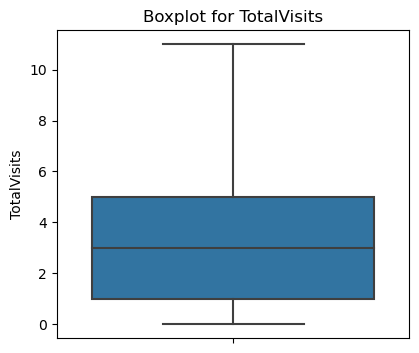

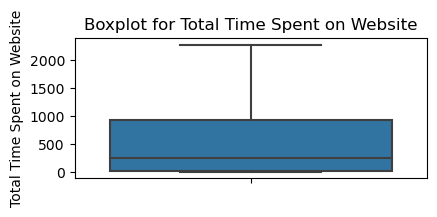

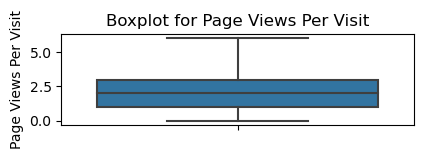

In [66]:
# Lets draw box plot after the outliers are handled.
univariateint_cols=['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

count=1

for i in univariateint_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(count,2,1)
    plt.title('Boxplot for '+i)
    sns.boxplot(y=df[i])
    count+=1
    plt.show()

From the above box plots, all the outliers are handled.

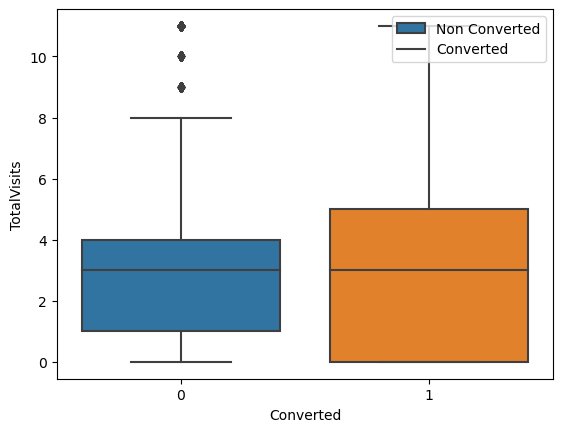

In [67]:
# Lets draw the boxplot again for TotalVisits with respect to "Converted" field.

sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.legend(labels=['Non Converted','Converted'],loc='upper right', bbox_to_anchor= (1.00, 1.00))
plt.show()

More the number of visitors, more the chances of them getting converted. Median is same for both 'Converted' and 'Non Converted' for total visits.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

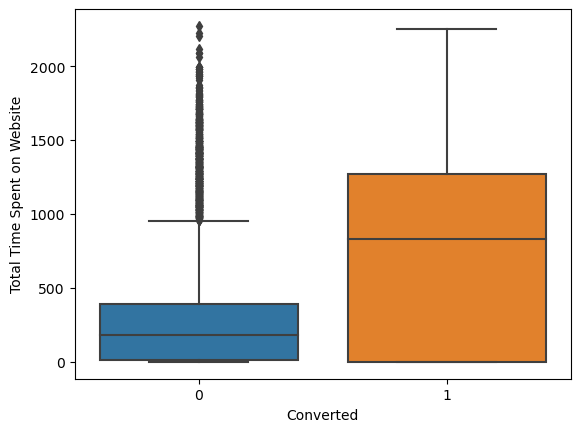

In [68]:
# Lets draw the boxplot for 'Total Time Spent on Website' with respect to "Converted" field.

sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)

If the time spent on the website is more, there are high chances of them being converted to hot leads.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

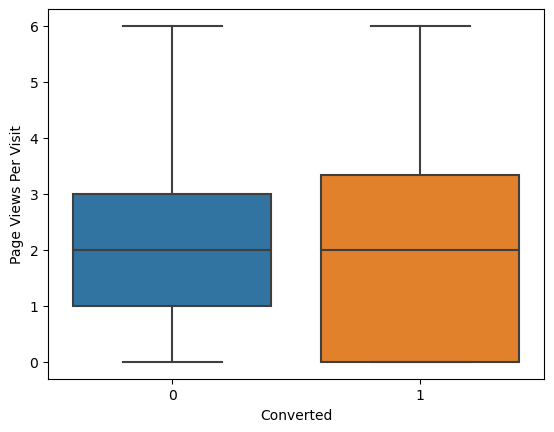

In [69]:
# Lets draw the boxplot for 'Page Views Per Visit' with respect to "Converted" field.

sns.boxplot(y='Page Views Per Visit',x='Converted',data=df)

Median is same for both 'Converted' and 'Non Converted' for page views per visit. In the lower quantile, we see that even though page views per visit is less, leads got converted.

In [70]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [71]:
df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

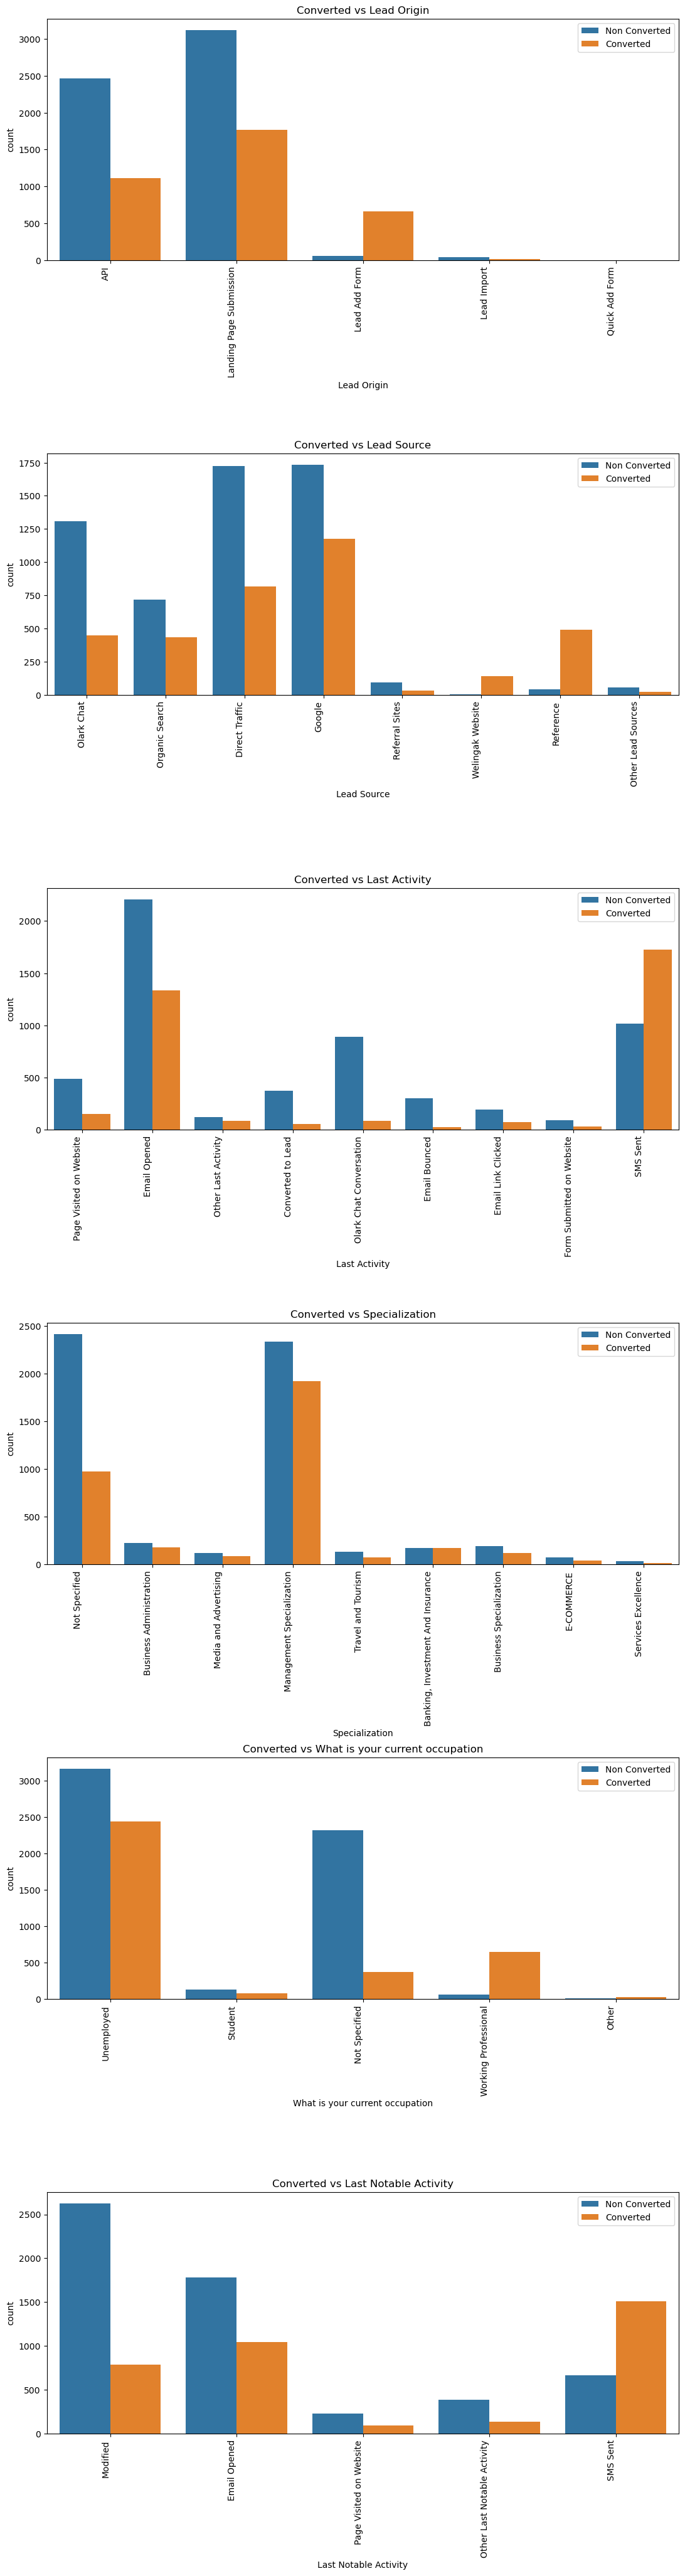

In [72]:

#Lets plot value counts for all the categorical fields and analyze.
pd.options.display.max_rows=10000
lstCategories_temp=['Lead Origin','Lead Source','Last Activity','Specialization', 'What is your current occupation',
                   'Last Notable Activity']

fig, axes = plt.subplots(nrows=6, ncols=1,figsize=(13,50))
count=0
col=0

for item in lstCategories_temp:
    g=sns.countplot(data=df,x=item,hue='Converted',ax=axes[count])
    axes[count].legend(labels=['Non Converted','Converted'],loc='upper right', bbox_to_anchor= (1.00, 1.00))
    axes[count].set_title('Converted vs '+item)
    g.set_xticklabels(g.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='right')
    count+=1

plt.subplots_adjust(hspace = 0.8)
plt.show()

In [73]:
# Lets see how much percentage of the leads are converted checking on the Specialization.
specialization_notconverted=df[df['Converted']==0].groupby(by=['Specialization'])['Converted'].count()
specialization_converted=df[df['Converted']==1].groupby(by=['Specialization'])['Converted'].count()

specialization_merged=specialization_notconverted.to_frame().merge(specialization_converted,on='Specialization')

specialization_merged['Convertedperc']=(specialization_merged['Converted_y']/(specialization_merged['Converted_y']+specialization_merged['Converted_x']))*100
specialization_merged.rename(columns={'Converted_x':'Not Converted','Converted_y':'Converted'},inplace=True)

specialization_merged


,Not Converted,Converted,Convertedperc
Specialization,,,
"Banking, Investment And Insurance",171,167,49.408284
Business Administration,224,179,44.416873
Business Specialization,192,116,37.662338
E-COMMERCE,72,40,35.714286
Management Specialization,2331,1922,45.191629
Media and Advertising,118,85,41.871921
Not Specified,2411,969,28.668639
Services Excellence,29,11,27.500000
Travel and Tourism,131,72,35.467980


In [74]:
# Lets see how much percentage of the leads are converted checking on the "what is your current occupation".

occupation_notconverted=df[df['Converted']==0].groupby(by=['What is your current occupation'])['Converted'].count()
occupation_converted=df[df['Converted']==1].groupby(by=['What is your current occupation'])['Converted'].count()

occupation_merged=occupation_notconverted.to_frame().merge(occupation_converted,on='What is your current occupation')

occupation_merged['Convertedperc']=(occupation_merged['Converted_y']/(occupation_merged['Converted_y']+occupation_merged['Converted_x']))*100
occupation_merged.rename(columns={'Converted_x':'Not Converted','Converted_y':'Converted'},inplace=True)

occupation_merged


,Not Converted,Converted,Convertedperc
What is your current occupation,,,
Not Specified,2320,370,13.754647
Other,9,25,73.529412
Student,132,78,37.142857
Unemployed,3159,2441,43.589286
Working Professional,59,647,91.643059


In [75]:
# Lets see how much percentage of the leads are converted checking on the "Last Notable Activity".

activity_notconverted=df[df['Converted']==0].groupby(by=['Last Notable Activity'])['Converted'].count()
activity_converted=df[df['Converted']==1].groupby(by=['Last Notable Activity'])['Converted'].count()

activity_merged=activity_notconverted.to_frame().merge(activity_converted,on='Last Notable Activity')

activity_merged['Convertedperc']=(activity_merged['Converted_y']/(activity_merged['Converted_y']+activity_merged['Converted_x']))*100
activity_merged.rename(columns={'Converted_x':'Not Converted','Converted_y':'Converted'},inplace=True)
activity_merged


,Not Converted,Converted,Convertedperc
Last Notable Activity,,,
Email Opened,1783,1044,36.929607
Modified,2624,783,22.982096
Other Last Notable Activity,383,133,25.775194
Page Visited on Website,225,93,29.245283
SMS Sent,664,1508,69.429098


##### Inferences:

###### For Lead Origin:

1. In terms of numbers, "Landing Page Submission" and "API" have more conversions when compared to Lead Add Form and Lead Import.
2. In terms of percentages, lot of the leads are converted for "Lead Add Form" Lead origin. So, conversion rate is high.

###### For Lead Source

1. Its observed that more number of leads are coming from Google, Direct Traffic and Olark Chat.
2. However, the conversion rate is more from "Reference" and "Welingak Website" Lead Source.

###### For Last Activity
1. Most of the leads have their last activity "Email Opened".
2. Most of the leads are converted when their last activity is SMS sent.

###### For Specialization
1. Conversion rates are good for leads specialized in "Banking, Investment And Insurance" (49%), "Management Specialization" (45%), Business Administration (44%).

###### For What is your current occupation
1. Most of the leads are from Unemployed occupation type. However, the conversion rate is low.
2. Many working professionals are converted may be for better career prospects (91.6%)

###### For Last Notable Activity
1. Even though most of the leads have "Modified" as their "Last Notable Activity", most of them are converted when a lead's last notable activity is "SMS Sent". Same inference can be obtained from the field "Last Activity" also.

Columns 'A free copy of Mastering The Interview', 'Do Not Email' have yes and no values which need to be converted to 0s and 1s.

In [76]:
# Custom function to change 'Yes' to 1 and 'No' to 0.
yesno_map_dict ={'Yes':1, 'No':0}

def custom_map(x,cust_dict):
    return x.map(cust_dict)


In [77]:
# Replacing 'Yes' to 1 and 'No' to 0 for better analysis and renaming 'A free copy of Mastering The Interview' to 'Freecopy'.
df[['Freecopy']]=df[['A free copy of Mastering The Interview']].apply(lambda x:custom_map(x,yesno_map_dict))
df[['Do Not Email']]=df[['Do Not Email']].apply(lambda x:custom_map(x,yesno_map_dict))


In [78]:
# As 'A free copy of Mastering The Interview' is renamed to 'Freecopy', we can drop the original column.
df.drop(['A free copy of Mastering The Interview'],axis=1,inplace=True)

In [79]:
# renaming few columns
df.rename(columns={'Total Time Spent on Website': 'TimeSpent', 'What is your current occupation': 'Occupation','Page Views Per Visit':'Page Views'},inplace=True)

In [80]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views,Last Activity,Specialization,Occupation,Last Notable Activity,Freecopy
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Modified,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Email Opened,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Unemployed,Modified,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Modified,0


##### Dummification of Categorical Variables

In [81]:
# We are dummifying the fields that have more than 2 categorical values.
lst_categoriesfordummies=['Lead Origin','Lead Source','Last Activity','Specialization','Occupation','Last Notable Activity']
categ_dummies=pd.get_dummies(df[lst_categoriesfordummies],drop_first=True)
categ_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [82]:
# We are concatenating original dataset with the dummified fields. 
df = pd.concat([df, categ_dummies], axis = 1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views,Last Activity,Specialization,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,0,0,0,0,1,0,1,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,0,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,1,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Last Activity,Media and Advertising,...,0,0,0,0,1,0,1,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,0,0,1,0,1,0,0,0


In [83]:
# Deleting the extra columns that are not required after dummification.
df.drop(lst_categoriesfordummies,axis=1,inplace=True)

In [84]:
df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views,Freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [85]:
df.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits', 'TimeSpent',
       'Page Views', 'Freecopy', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Lead Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Business Specialization', 'Specialization_E-COMMERCE',
       'Specialization_Management Specialization',
       'Specialization_Media an

#### Step 4: Test-Train Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variable to X
# Dropping 'Converted' field as its the response variable. 
# Dropping 'Lead Number' as its lead's unique identifier  and that will not help us in model prediction'. 
# Will add this column post model building for comparing actual vs predicted conversions.

X = df.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,TimeSpent,Page Views,Freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [88]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test with train set holding 70% and test set holding 30% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Step 5: Feature Scaling

Scaling helps us assess the impact of one feature over the other. It also helps in faster convergence of gradient descent algorithms, which in general are the optimization engine for most of these models.

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
#scaling basically reduces the values in a column to within a certain range — in this case, we have converted the 
#values to the Z-scores.

# We chose 'TotalVisits','TimeSpent','Page Views' columns as they are numeric values in the table (not considering dummified variables)
scaler = StandardScaler()

X_train[['TotalVisits','TimeSpent','Page Views']] = scaler.fit_transform(X_train[['TotalVisits','TimeSpent','Page Views']])

X_train.head()

,Do Not Email,TotalVisits,TimeSpent,Page Views,Freecopy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0,0.275215,0.005716,-0.516439,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0.624595,1.365219,1.553761,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3934,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [92]:
### Checking the conversion Rate because we want to get a sense of how much imbalance really there is in this whole data. 
converted_perc = (sum(df['Converted'])/len(df['Converted'].index))*100
converted_perc

38.53896103896104

This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

#### Step 6: Looking at Correlations

In [93]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

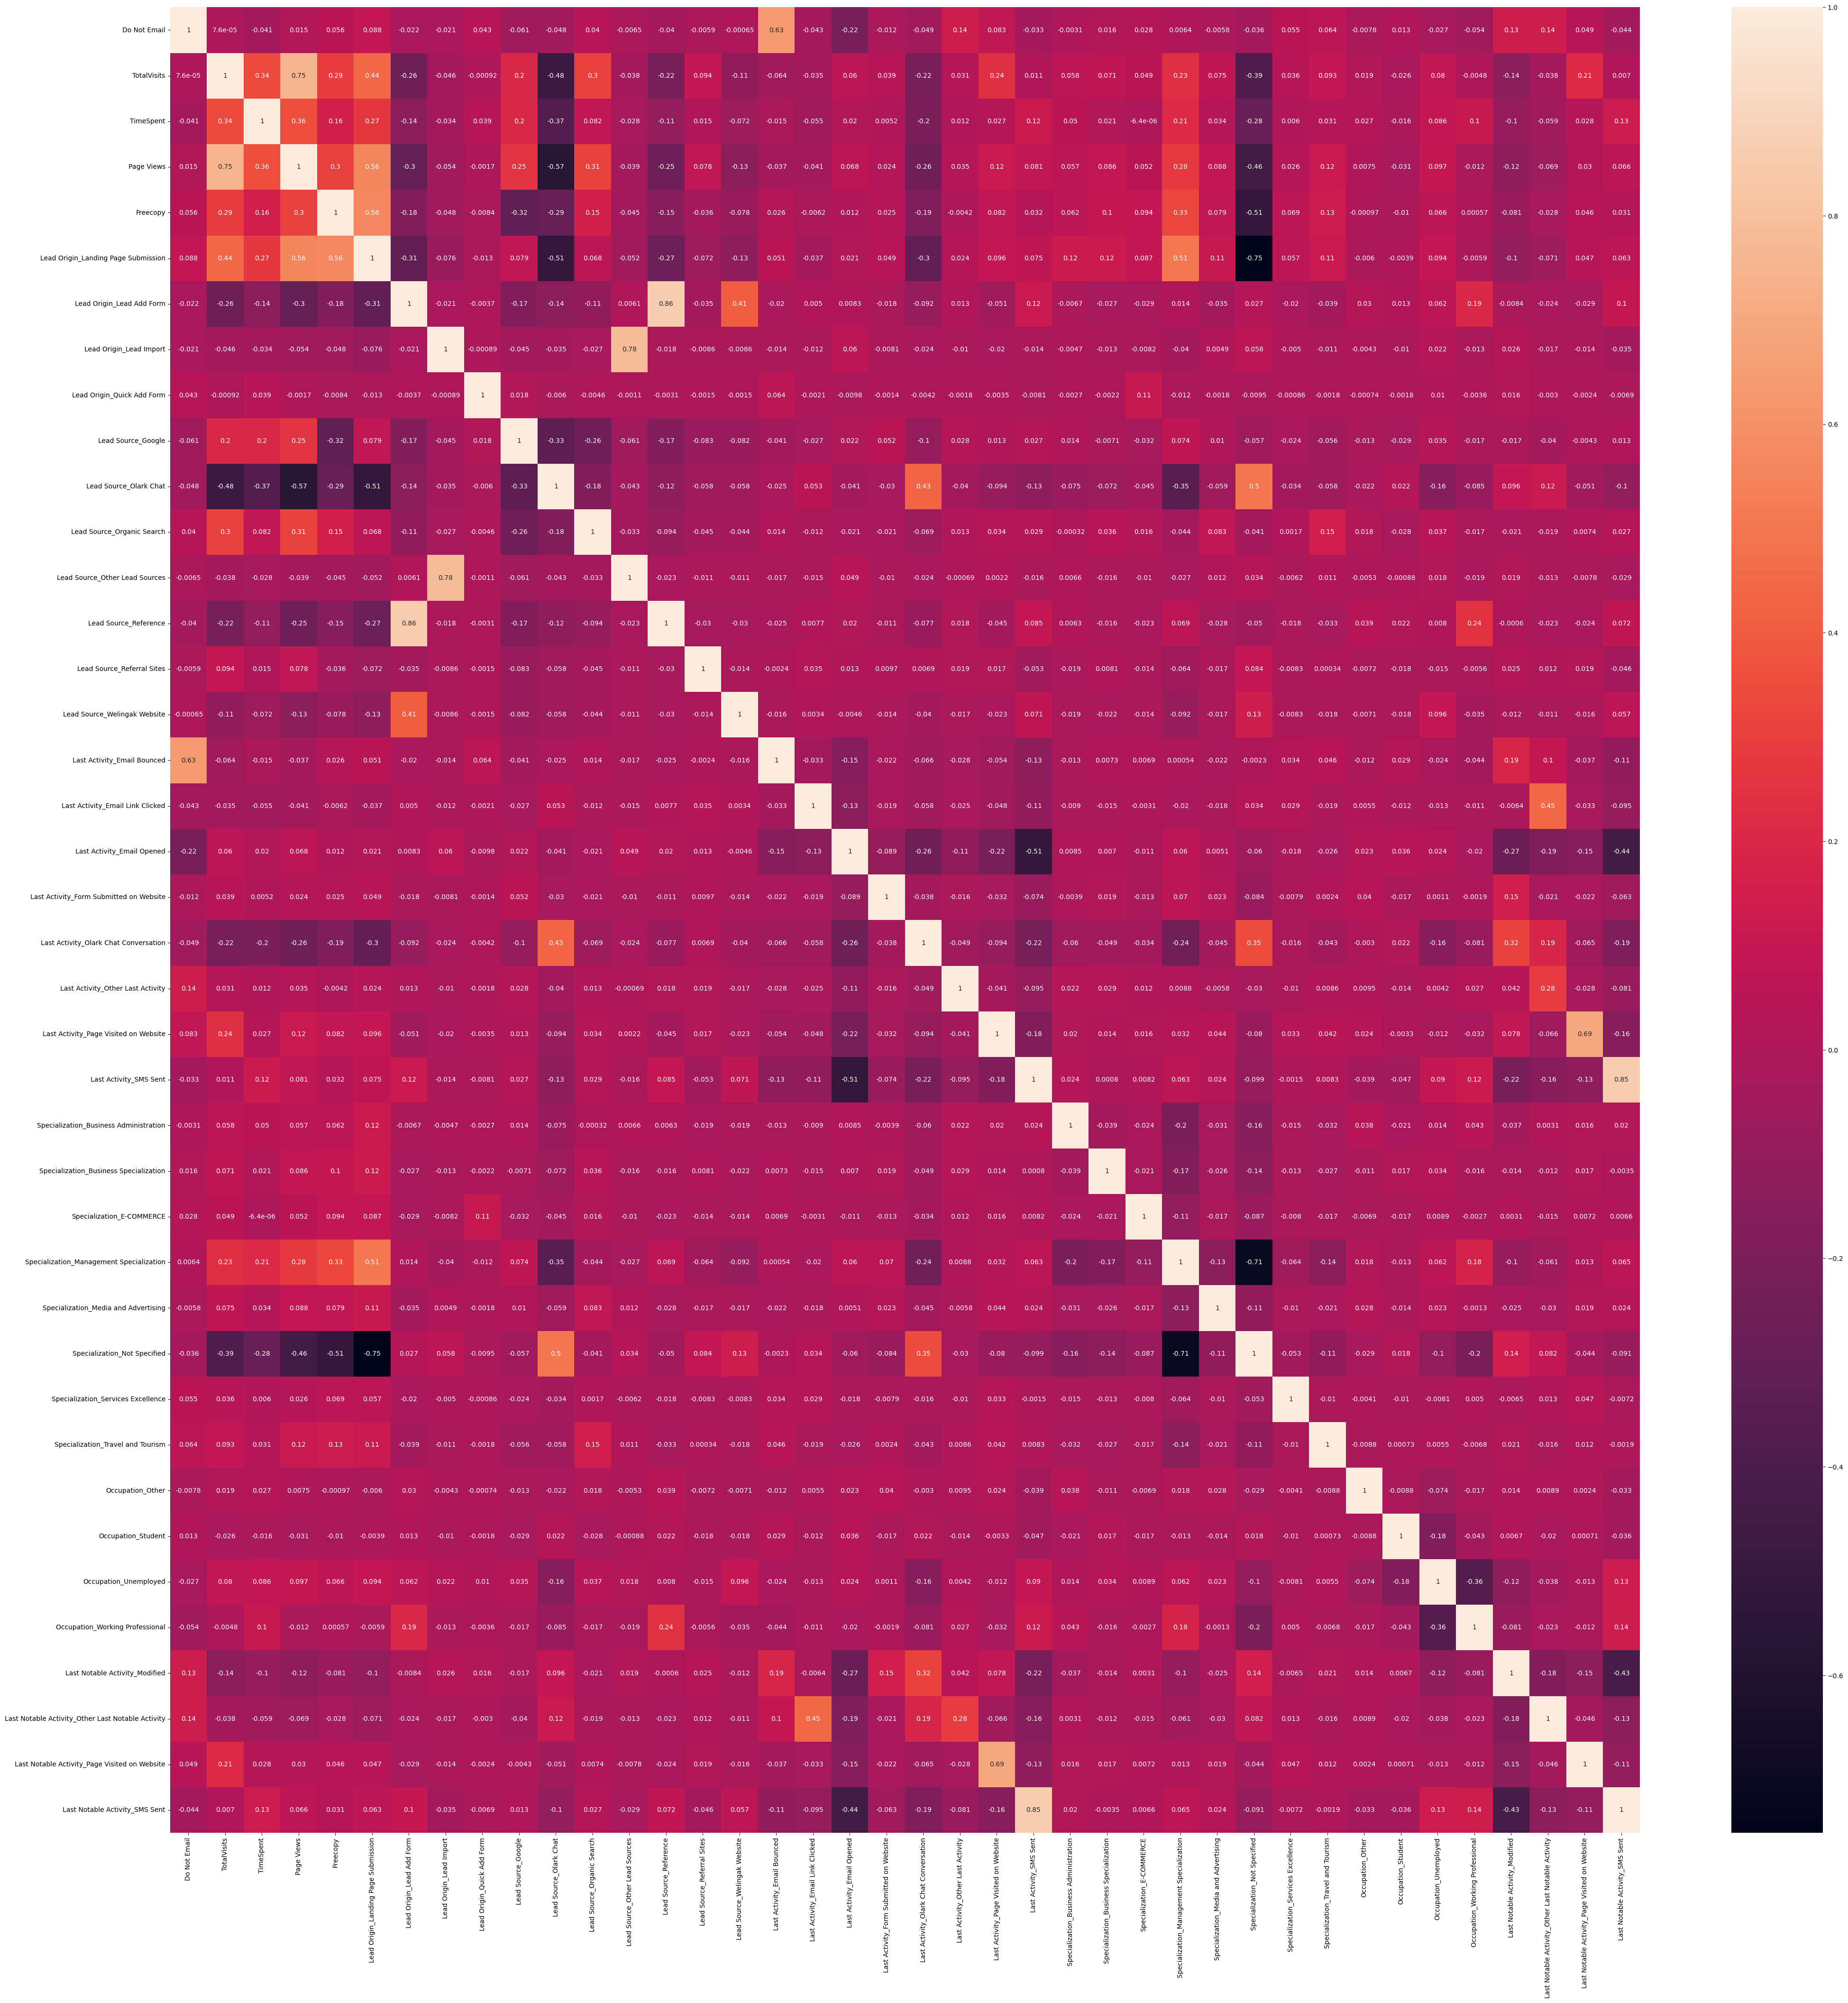

In [94]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Very light colors and the very dark colors are problem areas because it indicates they are highly correlated. We need to drop them based on business context. But this heat map looks very clumsy due to large number of columns. Lets do automatic elimination using RFE and manual elimination afterwards based on VIF.

#### Step 7: Model Building

In [95]:
import statsmodels.api as sm

In [96]:
# Logistic regression model. Creating model with all the columns just to see how basic model looks like.
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Mon, 19 Jun 2023   Deviance:                       5077.9
Time:                        09:58:28   Pearson chi2:                 7.07e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4197
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.0140      0.363     -5.553      0.000      -2.725      -1.303
Do Not Email                                         -1.1470      0.204     -5.622      0.000      -1.547      -0.747
TotalVisits                                           0.3258      0.055      5.909      0.000       0.218       0.434
TimeSpent                                             1.0608      0.041     26.056      0.000       0.981       1.141
Page Views                                           -0.3543      0.062     -5.706      0.000      -0.476      -0.233
Freecopy                                             -0.2448      0.110     -2.231      0.026      -0.460      -0.030
Lead Origin_Landing Page Submission                  -0.8224      0.140     -5.888      0.000      -1.096      -0.549
Lead Origin_Lead Add Form                             2.4364      0.507      4.809      0.000       1.443       3.429
Lead Origin_Lead Import                              -0.7975      0.807     -0.988      0.323      -2.379       0.784
Lead Origin_Quick Add Form                           19.2011   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                    0.2349      0.116      2.024      0.043       0.007       0.462
Lead Source_Olark Chat                                1.1433      0.168      6.787      0.000       0.813       1.473
Lead Source_Organic Search                            0.1228      0.133      0.922      0.357      -0.138       0.384
Lead Source_Other Lead Sources                        0.4934      0.633      0.779      0.436      -0.748       1.734
Lead Source_Reference                                 0.5060      0.545      0.928      0.353      -0.562       1.574
Lead Source_Referral Sites                            0.1436      0.330      0.435      0.663      -0.503       0.790
Lead Source_Welingak Website                          2.9178      0.882      3.310      0.001       1.190       4.646
Last Activity_Email Bounced                           0.0438      0.421      0.104      0.917      -0.781       0.869
Last Activity_Email Link Clicked                      0.1432      0.351      0.408      0.683      -0.545       0.831
Last Activity_Email Opened                            0.9897      0.254      3.900      0.000       0.492       1.487
Last Activity_Form Submitted on Website               0.3568      0.403      0.886      0.375      -0.432       1.146
Last Activity_Olark Chat Conversation                -0.3463      0.284     -1.218      0.223      -0.903       0.211
Last Activity_Other Last Activity                     1.3888      0.342      4.057      0.000       0.718       2.060
Last Activity_P

Null hypothesis is that the coefficient should have been zero. If the P value is high, then we see that there's a reasonable chance that it's just came by accident and this pattern or this relationship does not really exist that way. Lower the P value, higher the significance of that particular relationship or that coefficient. In this case, there are lot of features whose pvalue is high. There is scope to improve. Lets go with RFE to take 1st 20, use manual elimination process next.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

On the high level, its observed from the above that TotalVisits, TimeSpent, Lead Origin_Lead Add Form, Lead Source_Olark Chat, 
Lead Source_Welingak Website
,Last Activity_Email Opened
,Last Activity_Other Last Activity
,Last Activity_SMS Sent
,Specialization_Not Specified
,Occupation_Other
,Occupation_Student
,Occupation_Unemployed
,Occupation_Working Professional
,Last Notable Activity_SMS Sent have positive impact on the conversion rate.

#### Step 8: Feature Selection Using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True])

In [100]:
# Mapping the features with their rank of relevance to the target variable. 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('TimeSpent', True, 1),
 ('Page Views', False, 2),
 ('Freecopy', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Other Lead Sources', False, 9),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Specializati

In [101]:
#Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TimeSpent', 'Freecopy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other Last Notable Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [102]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Lead Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Business Specialization', 'Specialization_E-COMMERCE',
       'Specialization_Management Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

Assessing the model again using the features generated by RFE.

In [103]:
# Assessing the model again using the features generated by RFE.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.2
Date:                Mon, 19 Jun 2023   Deviance:                       5140.5
Time:                        09:58:29   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.4472      0.196     -7.392      0.000      -1.831      -1.063
Do Not Email                                         -1.2176      0.177     -6.862      0.000      -1.565      -0.870
TimeSpent                                             1.0636      0.040     26.455      0.000       0.985       1.142
Freecopy                                             -0.3030      0.089     -3.395      0.001      -0.478      -0.128
Lead Origin_Landing Page Submission                  -0.9603      0.133     -7.199      0.000      -1.222      -0.699
Lead Origin_Lead Add Form                             2.7926      0.205     13.645      0.000       2.391       3.194
Lead Origin_Lead Import                              -0.4097      0.521     -0.787      0.431      -1.430       0.611
Lead Source_Olark Chat                                1.0366      0.125      8.317      0.000       0.792       1.281
Lead Source_Welingak Website                          2.4605      0.746      3.299      0.001       0.999       3.922
Last Activity_Email Opened                            0.5454      0.133      4.091      0.000       0.284       0.807
Last Activity_Olark Chat Conversation                -0.5754      0.195     -2.946      0.003      -0.958      -0.193
Last Activity_Other Last Activity                     1.1739      0.261      4.498      0.000       0.662       1.685
Last Activity_SMS Sent                                1.2906      0.171      7.531      0.000       0.955       1.627
Specialization_Not Specified                         -1.0304      0.126     -8.187      0.000      -1.277      -0.784
Occupation_Other                                      1.9759      0.536      3.687      0.000       0.926       3.026
Occupation_Student                                    1.1157      0.250      4.456      0.000       0.625       1.606
Occupation_Unemployed                                 0.9841      0.089     11.002      0.000       0.809       1.159
Occupation_Working Professional                       3.3877      0.205     16.523      0.000       2.986       3.790
Last Notable Activity_Modified                       -0.5036      0.121     -4.167      0.000      -0.740      -0.267
Last Notable Activity_Other Last Notable Activity     0.3121      0.215      1.449      0.147      -0.110       0.734
Last Notable Activity_SMS Sent                        0.5152      0.193      2.669      0.008       0.137       0.893
=====================================================================================================================
"""

In [104]:
#Here the pvalue is high for "Lead Origin_Lead Import". So dropping that column and generating the model again.
col=col.drop('Lead Origin_Lead Import')

In [105]:
col

Index(['Do Not Email', 'TimeSpent', 'Freecopy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Modified',
       'Last Notable Activity_Other Last Notable Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [106]:
# Assessing the model again after dropping "Lead Origin_Lead Import" variable.

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.6
Date:                Mon, 19 Jun 2023   Deviance:                       5141.1
Time:                        09:58:29   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4140
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.4528      0.196     -7.427      0.000      -1.836      -1.069
Do Not Email                                         -1.2176      0.177     -6.862      0.000      -1.565      -0.870
TimeSpent                                             1.0653      0.040     26.531      0.000       0.987       1.144
Freecopy                                             -0.3023      0.089     -3.386      0.001      -0.477      -0.127
Lead Origin_Landing Page Submission                  -0.9483      0.132     -7.159      0.000      -1.208      -0.689
Lead Origin_Lead Add Form                             2.8066      0.204     13.762      0.000       2.407       3.206
Lead Source_Olark Chat                                1.0481      0.124      8.460      0.000       0.805       1.291
Lead Source_Welingak Website                          2.4591      0.746      3.297      0.001       0.997       3.921
Last Activity_Email Opened                            0.5383      0.133      4.046      0.000       0.278       0.799
Last Activity_Olark Chat Conversation                -0.5738      0.195     -2.938      0.003      -0.957      -0.191
Last Activity_Other Last Activity                     1.1756      0.261      4.504      0.000       0.664       1.687
Last Activity_SMS Sent                                1.2859      0.171      7.509      0.000       0.950       1.622
Specialization_Not Specified                         -1.0273      0.126     -8.174      0.000      -1.274      -0.781
Occupation_Other                                      1.9774      0.536      3.690      0.000       0.927       3.028
Occupation_Student                                    1.1163      0.250      4.458      0.000       0.626       1.607
Occupation_Unemployed                                 0.9830      0.089     10.989      0.000       0.808       1.158
Occupation_Working Professional                       3.3863      0.205     16.517      0.000       2.984       3.788
Last Notable Activity_Modified                       -0.5096      0.121     -4.226      0.000      -0.746      -0.273
Last Notable Activity_Other Last Notable Activity     0.3066      0.215      1.424      0.155      -0.116       0.729
Last Notable Activity_SMS Sent                        0.5148      0.193      2.669      0.008       0.137       0.893
=====================================================================================================================
"""

In [107]:
#Here the pvalue is high for "Last Notable Activity_Other Last Notable Activity" Occupation. So dropping that column and generating the model again.
col=col.drop('Last Notable Activity_Other Last Notable Activity')

In [108]:
# Assessing the model again after dropping "Occupation_Other" variable.

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Mon, 19 Jun 2023   Deviance:                       5143.1
Time:                        09:58:29   Pearson chi2:                 7.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3578      0.183     -7.404      0.000      -1.717      -0.998
Do Not Email                             -1.1931      0.176     -6.761      0.000      -1.539      -0.847
TimeSpent                                 1.0653      0.040     26.542      0.000       0.987       1.144
Freecopy                                 -0.3025      0.089     -3.391      0.001      -0.477      -0.128
Lead Origin_Landing Page Submission      -0.9499      0.132     -7.172      0.000      -1.209      -0.690
Lead Origin_Lead Add Form                 2.8189      0.204     13.829      0.000       2.419       3.218
Lead Source_Olark Chat                    1.0548      0.124      8.517      0.000       0.812       1.298
Lead Source_Welingak Website              2.4677      0.747      3.305      0.001       1.004       3.931
Last Activity_Email Opened                0.4572      0.120      3.812      0.000       0.222       0.692
Last Activity_Olark Chat Conversation    -0.5336      0.193     -2.763      0.006      -0.912      -0.155
Last Activity_Other Last Activity         1.2695      0.252      5.034      0.000       0.775       1.764
Last Activity_SMS Sent                    1.2692      0.171      7.433      0.000       0.935       1.604
Specialization_Not Specified             -1.0259      0.126     -8.164      0.000      -1.272      -0.780
Occupation_Other                          1.9652      0.534      3.681      0.000       0.919       3.012
Occupation_Student                        1.1032      0.250      4.408      0.000       0.613       1.594
Occupation_Unemployed                     0.9810      0.089     10.972      0.000       0.806       1.156
Occupation_Working Professional           3.3845      0.205     16.520      0.000       2.983       3.786
Last Notable Activity_Modified           -0.5894      0.107     -5.507      0.000      -0.799      -0.380
Last Notable Activity_SMS Sent            0.4360      0.185      2.358      0.018       0.074       0.798
=========================================================================================================
"""

In [109]:
#Here the pvalue is high for "Last Notable Activity_SMS Sent" tag. So dropping that column and generating the model again.
col=col.drop('Last Notable Activity_SMS Sent')

In [110]:
# Assessing the model again after dropping "Last Notable Activity_SMS Sent" variable.

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.3
Date:                Mon, 19 Jun 2023   Deviance:                       5148.7
Time:                        09:58:29   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4134
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2920      0.181     -7.128      0.000      -1.647      -0.937
Do Not Email                             -1.2062      0.177     -6.833      0.000      -1.552      -0.860
TimeSpent                                 1.0656      0.040     26.564      0.000       0.987       1.144
Freecopy                                 -0.3049      0.089     -3.422      0.001      -0.479      -0.130
Lead Origin_Landing Page Submission      -0.9474      0.133     -7.146      0.000      -1.207      -0.688
Lead Origin_Lead Add Form                 2.8229      0.204     13.854      0.000       2.424       3.222
Lead Source_Olark Chat                    1.0570      0.124      8.537      0.000       0.814       1.300
Lead Source_Welingak Website              2.4398      0.746      3.270      0.001       0.977       3.902
Last Activity_Email Opened                0.3917      0.117      3.357      0.001       0.163       0.620
Last Activity_Olark Chat Conversation    -0.5118      0.193     -2.648      0.008      -0.891      -0.133
Last Activity_Other Last Activity         1.2563      0.253      4.969      0.000       0.761       1.752
Last Activity_SMS Sent                    1.5604      0.117     13.289      0.000       1.330       1.791
Specialization_Not Specified             -1.0210      0.126     -8.117      0.000      -1.268      -0.774
Occupation_Other                          2.0070      0.535      3.753      0.000       0.959       3.055
Occupation_Student                        1.1230      0.250      4.486      0.000       0.632       1.614
Occupation_Unemployed                     1.0072      0.089     11.357      0.000       0.833       1.181
Occupation_Working Professional           3.4208      0.205     16.717      0.000       3.020       3.822
Last Notable Activity_Modified           -0.7367      0.088     -8.416      0.000      -0.908      -0.565
=========================================================================================================
"""

In [111]:
#Here the pvalue is high for "Last Activity_Olark Chat Conversation" tag. So dropping that column and generating the model again.
col=col.drop('Last Activity_Olark Chat Conversation')

In [112]:
# Assessing the model again after dropping "Last Activity_Olark Chat Conversation" variable.

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.0
Date:                Mon, 19 Jun 2023   Deviance:                       5156.0
Time:                        09:58:29   Pearson chi2:                 7.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4127
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4233      0.176     -8.100      0.000      -1.768      -1.079
Do Not Email                           -1.1575      0.176     -6.568      0.000      -1.503      -0.812
TimeSpent                               1.0689      0.040     26.581      0.000       0.990       1.148
Freecopy                               -0.3028      0.089     -3.389      0.001      -0.478      -0.128
Lead Origin_Landing Page Submission    -0.9404      0.133     -7.085      0.000      -1.201      -0.680
Lead Origin_Lead Add Form               2.8376      0.204     13.918      0.000       2.438       3.237
Lead Source_Olark Chat                  1.0083      0.122      8.251      0.000       0.769       1.248
Lead Source_Welingak Website            2.4544      0.747      3.286      0.001       0.990       3.918
Last Activity_Email Opened              0.5268      0.107      4.930      0.000       0.317       0.736
Last Activity_Other Last Activity       1.3776      0.250      5.519      0.000       0.888       1.867
Last Activity_SMS Sent                  1.6913      0.108     15.600      0.000       1.479       1.904
Specialization_Not Specified           -1.0347      0.126     -8.232      0.000      -1.281      -0.788
Occupation_Other                        2.0085      0.539      3.728      0.000       0.953       3.064
Occupation_Student                      1.1163      0.249      4.482      0.000       0.628       1.604
Occupation_Unemployed                   1.0154      0.089     11.467      0.000       0.842       1.189
Occupation_Working Professional         3.4421      0.205     16.771      0.000       3.040       3.844
Last Notable Activity_Modified         -0.7549      0.087     -8.635      0.000      -0.926      -0.584
=======================================================================================================
"""

In [113]:
# pvalue is less than 0.05 for all the features above.
# Before applying VIF to check the correlations among features, lets get the accuracy of the current model considering 0.5 
# as cut off probability.

# Getting the predicted values on the train set
y_train_pred6 = res.predict(X_train_sm)
y_train_pred6[:10]
# we got the probabilities

1871    0.545079
6795    0.104071
3516    0.343772
8105    0.858433
3934    0.166768
4844    0.991516
3297    0.129613
8071    0.994512
987     0.071413
7423    0.913679
dtype: float64

In [114]:
y_train_pred6 = y_train_pred6.values.reshape(-1)
y_train_pred6[:10]

array([0.54507866, 0.10407128, 0.34377238, 0.85843341, 0.16676838,
       0.99151559, 0.12961266, 0.9945122 , 0.07141284, 0.91367866])

In [115]:
# Clubbing actual converted values and converted probability values into a single dataframe and adding 'Lead Number' column for indexing. 
y_train_pred_final6 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred6})
y_train_pred_final6['Lead Number'] = y_train.index
y_train_pred_final6.head()

,Converted,Converted_Prob,Lead Number
0,0,0.545079,1871
1,0,0.104071,6795
2,0,0.343772,3516
3,0,0.858433,8105
4,0,0.166768,3934


In [116]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
# Assign whether this will be yes or no depending on some sort of cutoff say 0.5
y_train_pred_final6['predicted'] = y_train_pred_final6.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final6.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.545079,1871,1
1,0,0.104071,6795,0
2,0,0.343772,3516,0
3,0,0.858433,8105,1
4,0,0.166768,3934,0


In [117]:
from sklearn import metrics

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final6.Converted, y_train_pred_final6.predicted )
print(confusion)

[[3557  445]
 [ 715 1751]]


In [119]:
# Let's check the overall accuracy. Accuracy is 82.1% which is good.
print(metrics.accuracy_score(y_train_pred_final6.Converted, y_train_pred_final6.predicted))

0.8206555349412492


In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.54
13,Occupation_Unemployed,2.90
10,Specialization_Not Specified,2.80
7,Last Activity_Email Opened,2.49
9,Last Activity_SMS Sent,2.32
2,Freecopy,2.16
5,Lead Source_Olark Chat,1.93
15,Last Notable Activity_Modified,1.82
4,Lead Origin_Lead Add Form,1.79
14,Occupation_Working Professional,1.38


Looks like Occupation_Unemployed have high VIF. VIF indicates the correlation with other features. We need to eliminate features whose VIF>3 one after the other.

In [122]:
# Dropping Lead Origin_Landing Page Submission feature as it has high VIF.
col=col.drop('Lead Origin_Landing Page Submission')

In [123]:
#We will create the model again to see if there are significant variations
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.6
Date:                Mon, 19 Jun 2023   Deviance:                       5207.2
Time:                        09:58:30   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.1985      0.138    -15.929      0.000      -2.469      -1.928
Do Not Email                         -1.2034      0.175     -6.884      0.000      -1.546      -0.861
TimeSpent                             1.0828      0.040     26.984      0.000       1.004       1.161
Freecopy                             -0.4467      0.087     -5.164      0.000      -0.616      -0.277
Lead Origin_Lead Add Form             3.3329      0.192     17.381      0.000       2.957       3.709
Lead Source_Olark Chat                1.3143      0.115     11.446      0.000       1.089       1.539
Lead Source_Welingak Website          2.1844      0.746      2.930      0.003       0.723       3.646
Last Activity_Email Opened            0.5203      0.106      4.906      0.000       0.312       0.728
Last Activity_Other Last Activity     1.3618      0.249      5.479      0.000       0.875       1.849
Last Activity_SMS Sent                1.6503      0.107     15.374      0.000       1.440       1.861
Specialization_Not Specified         -0.4657      0.095     -4.891      0.000      -0.652      -0.279
Occupation_Other                      2.1163      0.528      4.012      0.000       1.082       3.150
Occupation_Student                    1.1137      0.244      4.564      0.000       0.635       1.592
Occupation_Unemployed                 1.0524      0.088     11.959      0.000       0.880       1.225
Occupation_Working Professional       3.5119      0.203     17.333      0.000       3.115       3.909
Last Notable Activity_Modified       -0.7385      0.087     -8.514      0.000      -0.909      -0.569
=====================================================================================================
"""

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,2.64
9,Specialization_Not Specified,2.41
6,Last Activity_Email Opened,1.98
8,Last Activity_SMS Sent,1.91
4,Lead Source_Olark Chat,1.88
2,Freecopy,1.74
14,Last Notable Activity_Modified,1.58
3,Lead Origin_Lead Add Form,1.57
13,Occupation_Working Professional,1.36
5,Lead Source_Welingak Website,1.27


In [125]:
# Lets check if there is any change in the accuracy after removing 'Lead Origin_Landing Page Submission' column

# Getting the predicted values on the train set
y_train_pred7 = res.predict(X_train_sm)
y_train_pred7 = y_train_pred7.values.reshape(-1)

y_train_pred_final7 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred7})
y_train_pred_final7['Lead Number'] = y_train.index


#Assign whether this will be yes or no depending on some sort of cutoff say 0.5
y_train_pred_final7['predicted'] = y_train_pred_final7.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final7.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.432874,1871,0
1,0,0.177700,6795,0
2,0,0.371488,3516,0
3,0,0.878951,8105,1
4,0,0.186279,3934,0


In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final7.Converted, y_train_pred_final7.predicted )
print(confusion)

[[3559  443]
 [ 752 1714]]


In [127]:
# Let's check the overall accuracy. Accuracy is 92.67% which is good.
# There is not much change in the accuracy after removing certain columns
print(metrics.accuracy_score(y_train_pred_final7.Converted, y_train_pred_final7.predicted))

0.8152442795299938


Looks like all the features have VIFs below 3. Even though accuracy is 81.5%, we will check few metrics as the confusion matrix has some misclassifications.

###### Metrics beyond simply accuracy

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('True Positive: ',TP)
print('True Negative: ',TN)
print('False Positive: ',FP)
print('False Negative: ',FN)

True Positive:  1714
True Negative:  3559
False Positive:  443
False Negative:  752


In [129]:
# Let's see the sensitivity of our logistic regression model
# Of all the actual conversions, how many did you correctly detect
TP / float(TP+FN)

0.6950527169505272

In [130]:
# Let us calculate specificity
# of all the negatives conversions, how many did you correctly detect
TN / float(TN+FP)

0.8893053473263368

In [131]:
# Calculate false postive rate - predicting conversion when customer have not converted

FP/ float(TN+FP)

0.11069465267366317

In [132]:
# positive predictive value or 'Precision'
# How many were you able to predict correct positives for all the predictions

TP / float(TP+FP)

0.7946221604079741

In [133]:
# Negative predictive value
#How many were you able to predict correct negatives for all the predictions

TN / float(TN+ FN)

0.8255625144977964

In [134]:
y_train_pred_final7.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.432874,1871,0
1,0,0.177700,6795,0
2,0,0.371488,3516,0
3,0,0.878951,8105,1
4,0,0.186279,3934,0


Logistic regression output is a probability model that outputs between 0 and 1 i.e., probability of conversion: indicates how confident the model is that this particular customer belongs to a particular class. The model does not predict the class label. The class label is something we assign based on these probabilities. it is our job to use these probabilities to convert them into a predicted label which is a zero or one. We need to find the optimal cut off point for the same. Lets see ROC curve 1st.

##### Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
4. TPR should be greater, FPR should be lesser, area (auc) should be greater.

In [135]:
import sklearn.metrics as metrics

In [136]:
# This method is used to draw the roc curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
# get the false positive rate, true positive rate, threshold values based on the last model 7.

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final7.Converted, y_train_pred_final7.Converted_Prob, drop_intermediate = False )

In [138]:
print(fpr)

[0.         0.         0.         ... 0.99950025 0.99975012 1.        ]


In [139]:
y_train_pred_final7.Converted_Prob.head()

0    0.432874
1    0.177700
2    0.371488
3    0.878951
4    0.186279
Name: Converted_Prob, dtype: float64

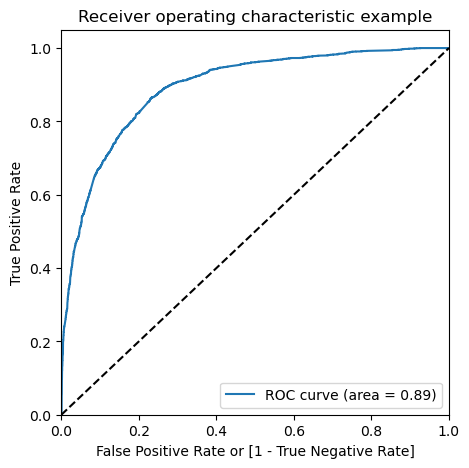

In [140]:
# Plotting ROC curve using draw_roc based on the model 7.
draw_roc(y_train_pred_final7.Converted, y_train_pred_final7.Converted_Prob)

The area under the curve whic is 0.89 seems to be good. But still lets find the optimal cut off point.

##### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity. There is a trade off of course, and we can balance. Run through different cut offs like .1, .2, .3 and .4 and so on till .9. Verify how sensitivity is moving, how specificity is moving, and how the overall accuracy is moving as well.

In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final7[i]= y_train_pred_final7.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final7.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.432874,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.177700,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.371488,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.878951,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.186279,3934,0,1,1,0,0,0,0,0,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final7.Converted, y_train_pred_final7[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.631725  0.970397  0.423038
0.2   0.2  0.760823  0.918086  0.663918
0.3   0.3  0.804113  0.865775  0.766117
0.4   0.4  0.817100  0.774939  0.843078
0.5   0.5  0.815244  0.695053  0.889305
0.6   0.6  0.805968  0.613544  0.924538
0.7   0.7  0.792053  0.540146  0.947276
0.8   0.8  0.764997  0.433901  0.969015
0.9   0.9  0.718615  0.284266  0.986257


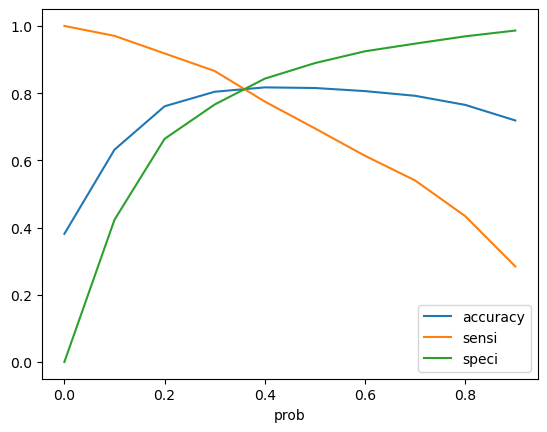

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [144]:
# Looks like 0.35 is the cut off point:
# Calculating final predicted values based on 0.35 cut off probability.
y_train_pred_final7['final_predicted'] = y_train_pred_final7.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final7.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.432874,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.177700,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.371488,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.878951,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.186279,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final7.Converted, y_train_pred_final7.final_predicted)

0.8109152752009895

In [146]:
# Calculating confusion matrix on final predicted values.
confusion_2 = metrics.confusion_matrix(y_train_pred_final7.Converted, y_train_pred_final7.final_predicted )
confusion_2

array([[3260,  742],
       [ 481, 1985]], dtype=int64)

In [147]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

print('True Positive: ',TP)
print('True Negative: ',TN)
print('False Positive: ',FP)
print('False Negative: ',FN)

True Positive:  1985
True Negative:  3260
False Positive:  742
False Negative:  481


In [148]:
print('Sensitivity: ',TP / float(TP+FN))
print('specificity: ',TN / float(TN+FP))
print('False Positive Rate: ',FP/ float(TN+FP))
print('False Negative Rate: ',FN/ float(TP+FN))
print('Positive Predictive Value: ',TP / float(TP+FP))
print('Negative Predictive Value: ',TN / float(TN+ FN))


Sensitivity:  0.8049472830494728
specificity:  0.8145927036481759
False Positive Rate:  0.1854072963518241
False Negative Rate:  0.19505271695052717
Positive Predictive Value:  0.727906123945728
Negative Predictive Value:  0.8714247527399092


#### Precision and Recall

Precision : of the things predicted as yes, how many are actually yes. Precision: Probability that a predicted 'Yes' is actually a 'Yes' out of total predictions. chances of you being right in identifying a yes.

Precision=TP/TP+FP 'Precision' is the same as the 'Positive Predictive Value'. How precise were you in your assessment.

Recall/sensitivity: Of all the yes cases which were present, how many could you get right. Recall: Probability that an actual 'Yes' case is predicted correctly.

Recall=TP/TP+FN 'Recall' is exactly the same as sensitivity.

In [149]:
print('Precision: ',confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1]))
print('Recall: ',confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1]))

Precision:  0.727906123945728
Recall:  0.8049472830494728


#### Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
#like we have the Roc curve, we also have a precision recall curve.
p, r, thresholds = precision_recall_curve(y_train_pred_final7.Converted, y_train_pred_final7.Converted_Prob)

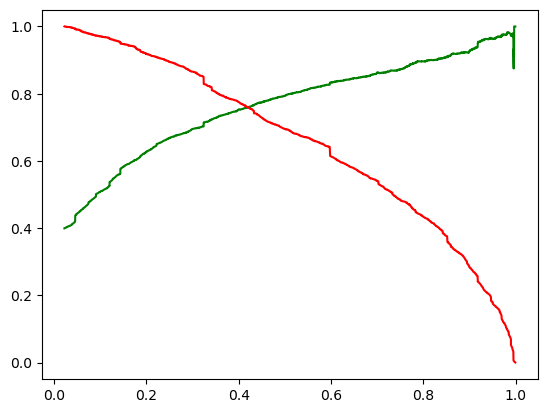

In [152]:
# Draw the precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From precision recall curve, 0.4 is the probability cut off. If threshold cutoff probability increases, precision will be high and Recall is low. If threshold cutoff probability decreases, precision will be low and Recall is high.

#### Step 11: Making predictions on the test set

Making Predictions So the model evaluation on the train set is complete and the model seems to be doing a decent job.

In [153]:
# using stand scaler for tranforming the few features
X_test[['TotalVisits','TimeSpent','Page Views']] = scaler.transform(X_test[['TotalVisits','TimeSpent','Page Views']])

In [154]:
# Filtering only a subset of columns that are used in training set. 
X_test = X_test[col]
X_test.head()

,Do Not Email,TimeSpent,Freecopy,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other Last Activity,Last Activity_SMS Sent,Specialization_Not Specified,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Modified
4269,0,0.964504,0,0,0,0,0,0,1,1,0,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,0,1,1,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,0,0,1,0
9199,0,-0.885371,0,0,1,0,0,0,0,1,0,0,1,0,1
4359,0,-0.885371,0,1,0,0,1,0,0,0,0,0,1,0,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred.head()

4269    0.507616
2376    0.917793
7766    0.862164
9199    0.119768
4359    0.851759
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.507616
2376,0.917793
7766,0.862164
9199,0.119768
4359,0.851759


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.507616
1,1,2376,0.917793
2,1,7766,0.862164
3,0,9199,0.119768
4,1,4359,0.851759


In [164]:
# Renaming the column from 0 to "Converted_Prob"
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [165]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.507616
1,1,2376,0.917793
2,1,7766,0.862164
3,0,9199,0.119768
4,1,4359,0.851759


In [166]:
# Calculating final predicted values for the test dataset based on the 0.35 cut off probability. 
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [167]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.507616,1
1,1,2376,0.917793,1
2,1,7766,0.862164,1
3,0,9199,0.119768,0
4,1,4359,0.851759,1


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816017316017316

In [169]:
# Lets find the confusion matrix for the test dataset.
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1380,  297],
       [ 213,  882]], dtype=int64)

In [170]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

print('True Positive: ',TP)
print('True Negative: ',TN)
print('False Positive: ',FP)
print('False Negative: ',FN)

True Positive:  882
True Negative:  1380
False Positive:  297
False Negative:  213


In [171]:
print('Recall/Sensitivity: ',TP / float(TP+FN))
print('specificity: ',TN / float(TN+FP))
print('Precision: ',TP/(TP+FP))
print('False Positive Rate: ',FP/ float(TN+FP))
print('False Negative Rate: ',FN/ float(TP+FN))
print('Positive Predictive Value: ',TP / float(TP+FP))
print('Negative Predictive Value: ',TN / float(TN+ FN))

Recall/Sensitivity:  0.8054794520547945
specificity:  0.8228980322003577
Precision:  0.7480916030534351
False Positive Rate:  0.1771019677996422
False Negative Rate:  0.19452054794520549
Positive Predictive Value:  0.7480916030534351
Negative Predictive Value:  0.8662900188323918


In [172]:
# Calculating the lead score for train and test dataset together.
df_trainset=y_train_pred_final7[['Lead Number','Converted_Prob']]
df_testset=y_pred_final[['Lead Number','Converted_Prob']]
Lead_Score=pd.concat([y_train_pred_final7[['Lead Number','Converted_Prob']],
                      y_pred_final[['Lead Number','Converted_Prob']]],axis=0)
Lead_Score.head()

print(df_trainset.shape)
print(df_testset.shape)
print(Lead_Score.shape)


(6468, 2)
(2772, 2)
(9240, 2)


In [173]:
# Finding Lead Score:

Lead_Score['Lead Score']=Lead_Score.Converted_Prob.map(lambda x:round(x*100))

Lead_Score.head()

,Lead Number,Converted_Prob,Lead Score
0,1871,0.432874,43
1,6795,0.177700,18
2,3516,0.371488,37
3,8105,0.878951,88
4,3934,0.186279,19


From the above analysis, we can conclude:
    
####### Train Dataset Metrics:

Accuracy: 81.1%
Recall/Sensitivity:  80.5%
Specificity:  81.5%
Precision:  72.8%

ROC: 0.89

####### Test Dataset Metrics:

Accuracy: 81.6%
Recall/Sensitivity:  80.5%
Specificity:  82.3%
Precision:  74.81%
    
    
Looks like the model is behaving the good with training and the test dataset. 

Recommendations:

Target the leads:
    Whose total visits, total time spent on website are more.
    Who is either “working professional” or “unemployed” or “Student”.
    Through “Welingak Website”, “Reference”, “Olark Chat” lead sources.
    Whose last activity or last notable activity is SMS sent.
    Working in “Banking, Investment And Insurance”, any Management Specialization or “Business Administration” specialization.
    Whose lead origin is “Lead Add Form”.